# loading libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv("water_potability.csv")

# 1. Display the first 5 rows of the table:


In [3]:
print("5 first rows of the table:")
display(df.head())

5 first rows of the table:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Description of the data:


In [4]:
display(df.describe())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Checking missing values per attribute:

In [5]:
missing=df.isnull().sum()
display(missing)

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


# Histograms and each feature:

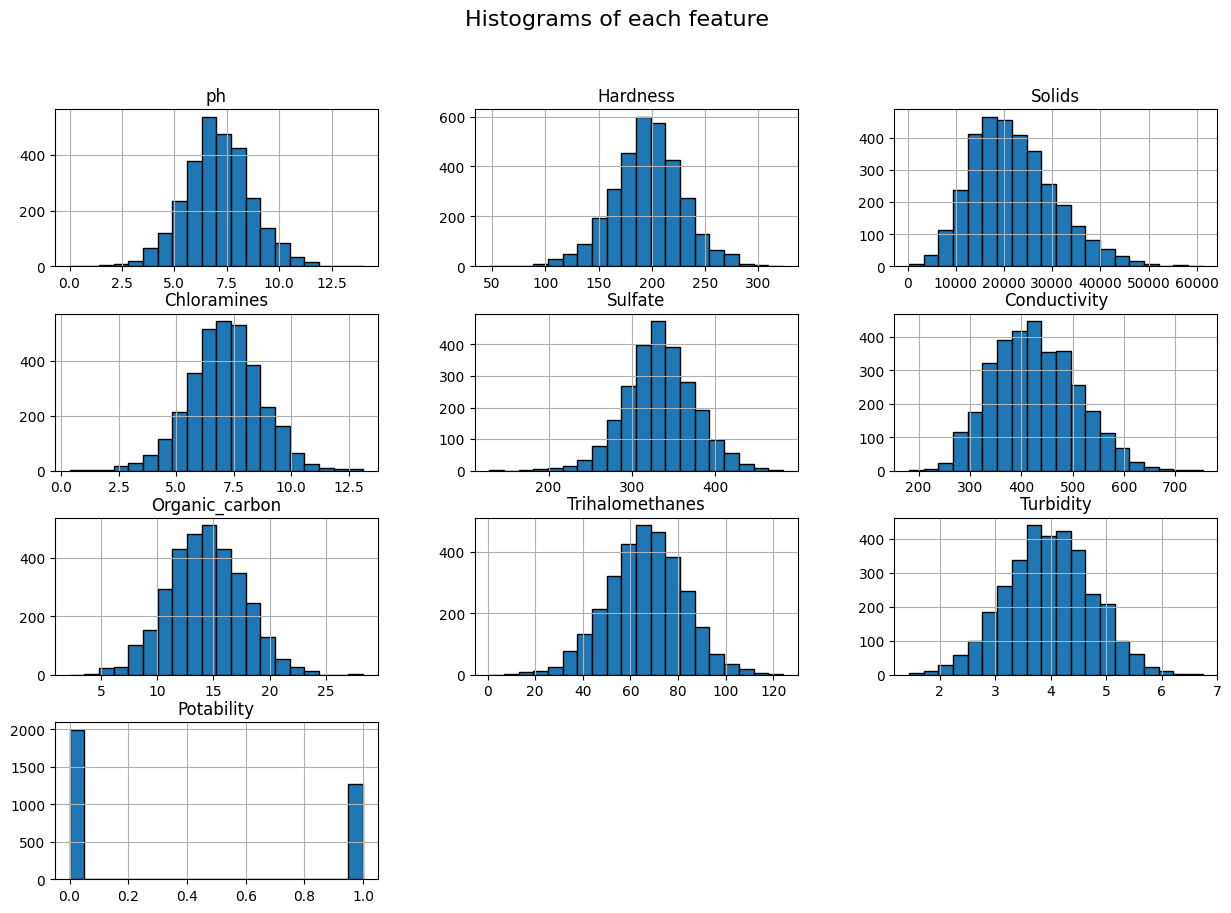

In [6]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms of each feature", fontsize=16)
plt.show()

# Bar chart for the Potability feature:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

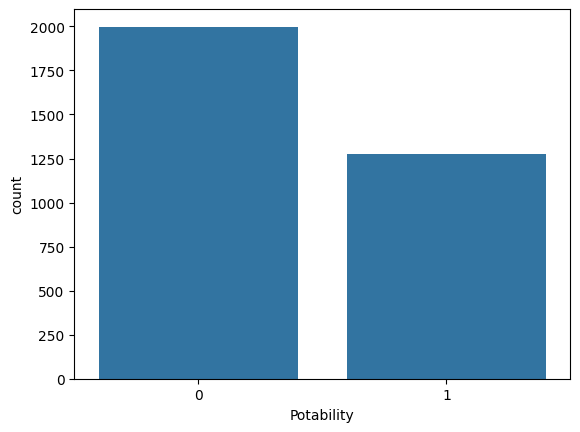

In [8]:
sns.countplot(x='Potability', data=df )
plt.show()

# Percentages of drinkable and undrinkable water:

In [9]:
potability_counts=df['Potability'].value_counts(normalize=True)*100
print(potability_counts.round(2))

Potability
0    60.99
1    39.01
Name: proportion, dtype: float64


# Evaluation of the data:
Based on the description of the data, I can say that the data is of moderate quality. In particular, for the pH value, I see that the average value is close to 7, which is natural for water. In addition, I see that the hardness and total solids take on many values, i.e., they have a wide range of values, which indicates that the data came from many different water sources, which I would characterize as good.

Of course, there are gaps of 20%-25% in some characteristics such as pH, sulfates, and trihalomethanes. This cannot be good because the model will not be trained correctly if there are gaps in the data.

I also note that most variables have an asymmetrical distribution and some show extreme values, such as organic carbon and solids.


# 2. Data separation by category of the **pH**

In [10]:
low_ph=df[df['ph']<6.5]
normal_ph=df[(df['ph']>=6.5) & (df['ph']<=8.5)]
high_ph=df[df['ph']>8.5]

# Calculation of drinkable and non-drinkable water percentages:

In [11]:
def potability_percent(sub_df):
    return sub_df['Potability'].value_counts(normalize=True) * 100


print(" pH < 6.5")
print(potability_percent(low_ph))

print("\n 6.5 ≤ pH ≤ 8.5")
print(potability_percent(normal_ph))

print("\n pH > 8.5")
print(potability_percent(high_ph))

 pH < 6.5
Potability
0    63.22314
1    36.77686
Name: proportion, dtype: float64

 6.5 ≤ pH ≤ 8.5
Potability
0    56.099398
1    43.900602
Name: proportion, dtype: float64

 pH > 8.5
Potability
0    66.871166
1    33.128834
Name: proportion, dtype: float64


# Evaluation:

From the results of the percentages, we observe that the highest percentage of drinkable water from our data is indeed within the range of 6.5-8.5 (43.9%). However, within this range, there is also a significant amount of non-potable water, at 56.1%. We can see, therefore, that it is not 100% potable. Furthermore, there is a lot of drinkable water outside the range of 6.5-8.5. Therefore, this data does not fully correspond to my data.


# 3. Scatter plot creation

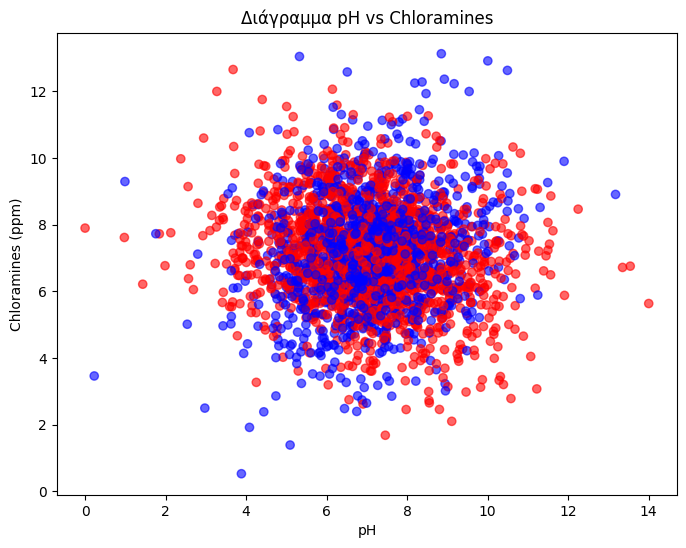

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
colors = df['Potability'].map({0: 'red', 1: 'blue'})
plt.scatter(df['ph'], df['Chloramines'], c=colors, alpha=0.6)
plt.title("Διάγραμμα pH vs Chloramines")
plt.xlabel("pH")
plt.ylabel("Chloramines (ppm)")
plt.show()

# Evaluation:
I see that the points on the graph are very scattered and we cannot draw conclusions based on these two variables alone. There are drinkable and undrinkable samples across the entire range of pH and chloramines, and the 4 ppm line does not even separate the types.
For better classification, other characteristics will be needed; these two alone are not enough.

# 4. Filling in gaps in the data

In [13]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
       mean_val=df[col].mean()
       df[col]= df[col].fillna(mean_val)

# 5. Numpy arrays creation:

In [14]:
from re import X
import numpy as np
X=df.drop("Potability", axis=1).values
y=df["Potability"].values

Separation in train-test:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

print("train test:", X_train.shape, y_train.shape)
print("test test:", X_test.shape, y_test.shape)



train test: (2293, 9) (2293,)
test test: (983, 9) (983,)


# 6. Desicion Tree

Creation of the model and training in the training set:

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

Prediction and accuracy measurement

In [17]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

train_acc=accuracy_score(y_train, y_train_pred)
test_acc=accuracy_score(y_test, y_test_pred)

print("Accuracy to Training set:", train_acc)
print("Accuracy to test set:", test_acc)

Accuracy to Training set: 1.0
Accuracy to test set: 0.5747711088504578


# 7. Parameter Selection



In [18]:
from logging import critical
import itertools

criteria=["gini", "entropy"]
max_dephts=[None, 3, 5]
min_samples_splits=[2, 5]
min_samples_leafs=[1,2]
max_features_list=[None, "sqrt"]
ccp_alphas=[0, 0.01]

results=[]

Testing all of the conbinations:

In [19]:
for crit, depth, split, leaf, feat, ccp in itertools.product(criteria, max_dephts, min_samples_splits, min_samples_leafs, max_features_list, ccp_alphas):
  dt=DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, max_features=feat, ccp_alpha=ccp, random_state=0)

  dt.fit(X_train, y_train)

  train_acc=accuracy_score(y_train, dt.predict(X_train))
  test_acc=accuracy_score(y_test, dt.predict(X_test))

  results.append([crit, depth, split, leaf, feat, ccp, train_acc, test_acc])

Data Frame creation with all of the results:

In [20]:
results_df=pd.DataFrame(results, columns=["criterion", "max_depth", "min_samples_split",
                                          "min_samples_leaf", "max_features", "ccp_alpha", "train_cc", "test_acc"])

results_df.sort_values(by="test_acc", ascending=False).head(10)

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_cc,test_acc
92,entropy,5.0,5,2,None,0.0,0.671173,0.655137
84,entropy,5.0,2,2,None,0.0,0.671173,0.655137
80,entropy,5.0,2,1,None,0.0,0.671609,0.654120
88,entropy,5.0,5,1,None,0.0,0.671609,0.654120
36,gini,5.0,2,2,None,0.0,0.662015,0.643947
44,gini,5.0,5,2,None,0.0,0.662015,0.642930
32,gini,5.0,2,1,None,0.0,0.662887,0.641913
40,gini,5.0,5,1,None,0.0,0.662015,0.641913
64,entropy,3.0,2,1,None,0.0,0.641082,0.639878
68,entropy,3.0,2,2,None,0.0,0.641082,0.639878


# 8.Filter with max depth 3:

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
depth3_df = results_df[results_df['max_depth'] == 3]

Best Selection:

In [22]:
best_depth3 = depth3_df.loc[depth3_df['test_acc'].idxmax()]
print("Best combination wit max depth 3")
print(best_depth3)
print()

Best combination wit max depth 3
criterion             entropy
max_depth                 3.0
min_samples_split           2
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0
train_cc             0.641082
test_acc             0.639878
Name: 64, dtype: object



Re-train the tree:

In [23]:
best_dt3 = DecisionTreeClassifier(
    criterion=best_depth3['criterion'],
    max_depth=3,
    min_samples_split=int(best_depth3['min_samples_split']),
    min_samples_leaf=int(best_depth3['min_samples_leaf']),
    max_features=None if best_depth3['max_features'] == 'None' else best_depth3['max_features'],
    ccp_alpha=float(best_depth3['ccp_alpha']),
    random_state=0)
best_dt3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Visualization of the tree:

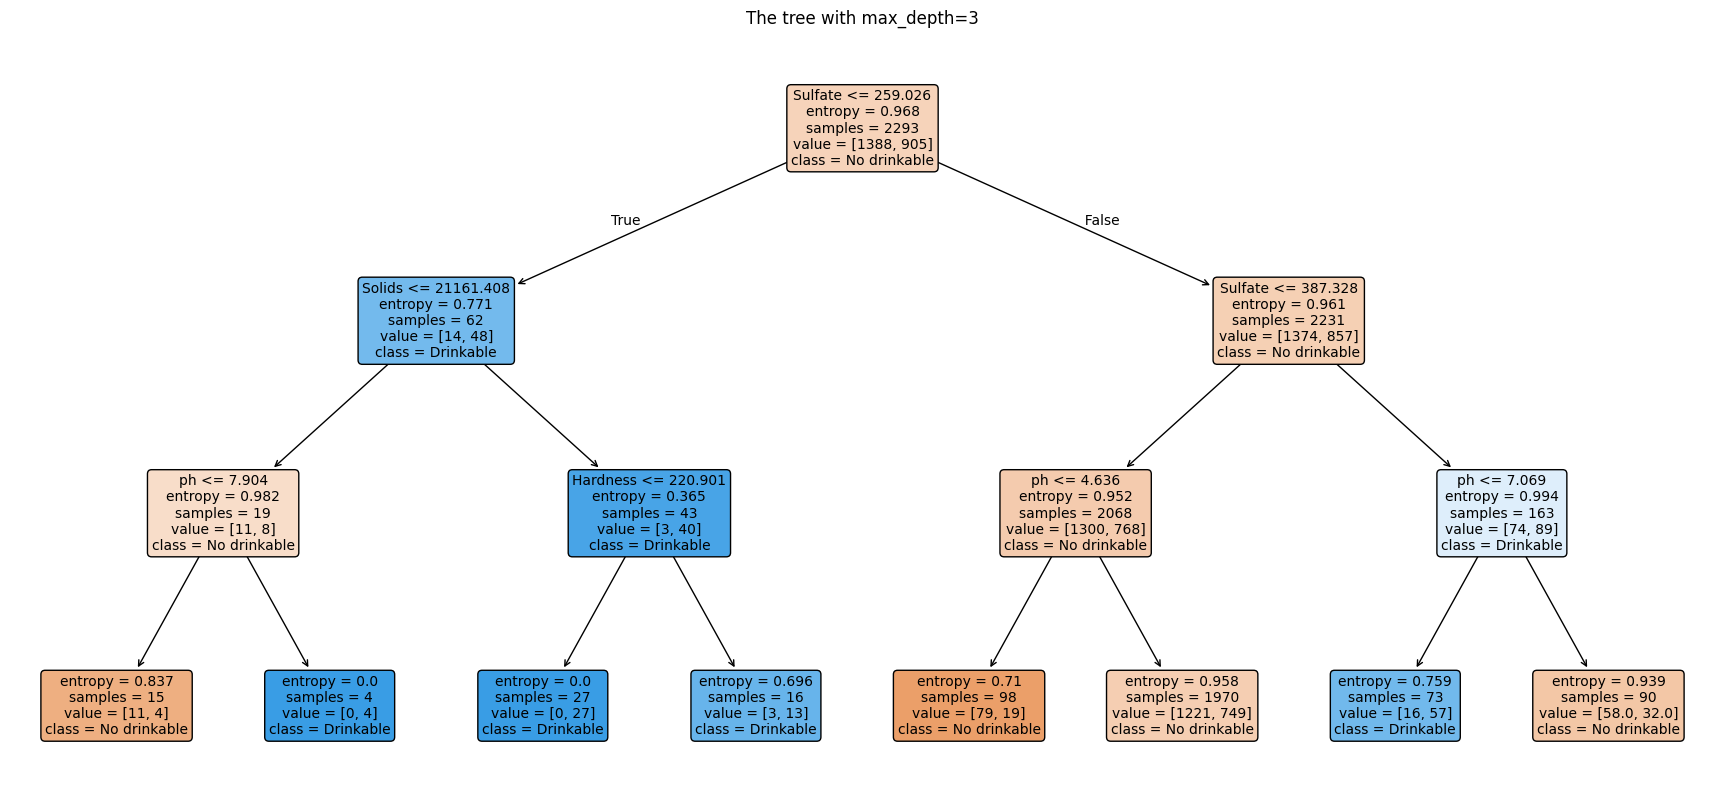

In [24]:
plt.figure(figsize=(22,10))
plot_tree(
    best_dt3,
    feature_names=df.drop('Potability', axis=1).columns,
    class_names=['No drinkable', 'Drinkable'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("The tree with max_depth=3")
plt.show()

The decision tree he has created has a depth of 3, meaning that it makes decisions based on 3 characteristics of water.

# 9. Feature Importance:

In [25]:
from sklearn.metrics import accuracy_score

best_idx = results_df['test_acc'].idxmax()
best_row = results_df.loc[best_idx]
print("Best combination")
print(best_row)

Best combination
criterion             entropy
max_depth                 5.0
min_samples_split           2
min_samples_leaf            2
max_features             None
ccp_alpha                 0.0
train_cc             0.671173
test_acc             0.655137
Name: 84, dtype: object


Re-Training of the tree with the best combination:

In [26]:
best_dt = DecisionTreeClassifier(
    criterion=best_row['criterion'],
    max_depth=None if best_row['max_depth'] == 'None' else int(best_row['max_depth']),
    min_samples_split=int(best_row['min_samples_split']),
    min_samples_leaf=int(best_row['min_samples_leaf']),
    max_features=None if best_row['max_features'] == 'None' else best_row['max_features'],
    ccp_alpha=float(best_row['ccp_alpha']),
    random_state=0
)

best_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=0)

Accuracy on the training and test set:

In [27]:
train_acc = accuracy_score(y_train, best_dt.predict(X_train))
test_acc = accuracy_score(y_test, best_dt.predict(X_test))
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.6712
Test Accuracy: 0.6551


Feature importance:

In [28]:
feature_names = df.drop("Potability", axis=1).columns
importances = best_dt.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature importance:")
display(feat_imp_df)


Feature importance:


,Feature,Importance
4,Sulfate,0.298956
0,ph,0.244768
3,Chloramines,0.191956
1,Hardness,0.091392
2,Solids,0.086400
7,Trihalomethanes,0.053536
8,Turbidity,0.020127
5,Conductivity,0.012864
6,Organic_carbon,0.000000


Bar Chart creation:

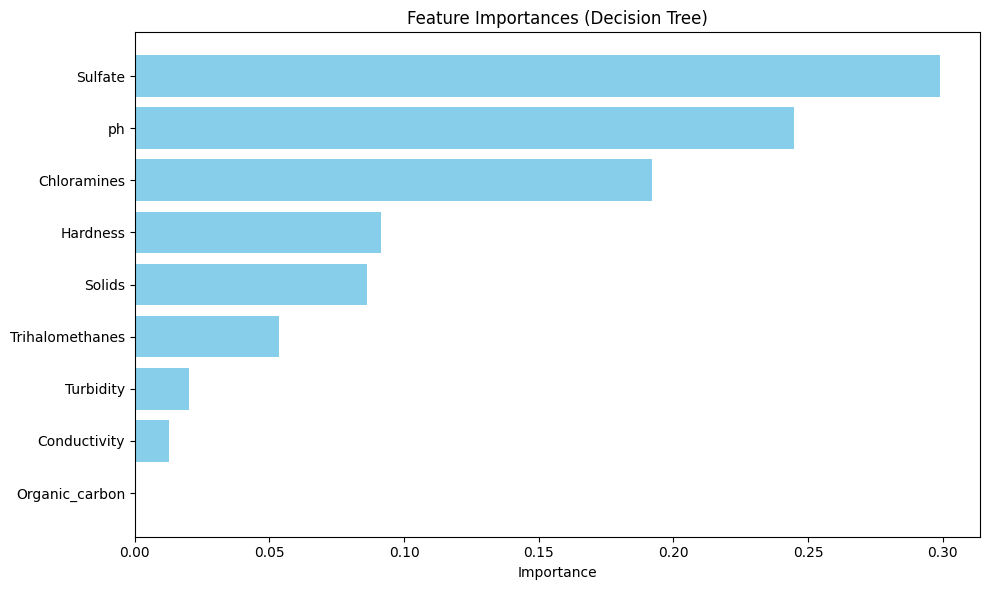

In [29]:
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Having created a graph showing the importance of each characteristic, we see that the five most important characteristics are: Sulfates, pH, Chloramines, Hardness and Solids. Therefore, if the device could support up to 5 chemical analyses, it would have to extract these characteristics, as they are the ones that are most important.

# 11. Random Forest vs Decision Tree:

A random forest may be more accurate than a single tree because it combines many decision trees and does not rely solely on one tree, thus reducing errors and making it more reliable and stable. Also, in a random forest, we have a reduction in overfitting because it generalizes better and has less variance, so it can predict better.

# 12. Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_opts = [None, 'sqrt']
n_estimators_opts = [50, 100, 200]

rf_results = pd.DataFrame(columns=[
    'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'n_estimators', 'train_acc', 'test_acc'
])

Loop for all the combinations:

In [31]:
for criterion in criteria:
    for max_depth in max_depths:
        for min_split in min_samples_splits:
            for min_leaf in min_samples_leafs:
                for max_feat in max_features_opts:
                    for n_est in n_estimators_opts:
                        rf = RandomForestClassifier(
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_split,
                            min_samples_leaf=min_leaf,
                            max_features=max_feat,
                            n_estimators=n_est,
                            random_state=0
                        )
                        rf.fit(X_train, y_train)
                        train_acc = accuracy_score(y_train, rf.predict(X_train))
                        test_acc = accuracy_score(y_test, rf.predict(X_test))

                        rf_results = pd.concat([rf_results, pd.DataFrame([{
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_split,
                            'min_samples_leaf': min_leaf,
                            'max_features': max_feat,
                            'n_estimators': n_est,
                            'train_acc': train_acc,
                            'test_acc': test_acc
                        }])], ignore_index=True)


/tmp/ipython-input-1932374359.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rf_results = pd.concat([rf_results, pd.DataFrame([{


Display of the first rows:

In [33]:
rf_results.sort_values(by='test_acc', ascending=False).head(10)

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,n_estimators,train_acc,test_acc
4,gini,None,2,1,sqrt,100,1.000000,0.697864
3,gini,None,2,1,sqrt,50,1.000000,0.693795
95,entropy,None,5,2,sqrt,200,0.999564,0.693795
77,entropy,None,2,1,sqrt,200,1.000000,0.692777
76,entropy,None,2,1,sqrt,100,1.000000,0.689725
83,entropy,None,2,2,sqrt,200,0.999564,0.689725
5,gini,None,2,1,sqrt,200,1.000000,0.689725
82,entropy,None,2,2,sqrt,100,1.000000,0.689725
81,entropy,None,2,2,sqrt,50,0.999564,0.688708
17,gini,None,5,1,sqrt,200,1.000000,0.687691


# 13. Explaination on the importance of the prediction of the model:

In this application, I believe that the model should better predict non-potable water with greater accuracy. Incorrect classification of drinkable and non-drinkable water can have very serious consequences for human health. If the model incorrectly predicts non-drinkable water as drinkable, it will clearly be much worse than the opposite case.

# 14. Best tree or best Random forest

I believe that a random forest is the best legal choice for a company. I believe that a random forest is more reliable and stable in a given situation because it consists of many independent trees and combines many predictions. Furthermore, if a mistake is made and there is an inaccurate prediction of drinkable and undrinkable water, the company can point to the random forest and show that it made its decision based on a scientific method and approach and did not rely on just one tree.